In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crx-data/crx.data


In [2]:
#import credit card datadata
#there is no column names in dataset. so add header in read_csv


df = pd.read_csv("/kaggle/input/crx-data/crx.data",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
#rename our column names with our own names like 'A1 , A2 .....'

#lets create a list of names

var_names = [f'A{var}' for var in range(1,len(df.columns)+1)]
var_names

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16']

In [4]:
#re name the columns

df.columns = var_names
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
#inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
df.dtypes.to_dict()

{'A1': dtype('O'),
 'A2': dtype('O'),
 'A3': dtype('float64'),
 'A4': dtype('O'),
 'A5': dtype('O'),
 'A6': dtype('O'),
 'A7': dtype('O'),
 'A8': dtype('float64'),
 'A9': dtype('O'),
 'A10': dtype('O'),
 'A11': dtype('int64'),
 'A12': dtype('O'),
 'A13': dtype('O'),
 'A14': dtype('O'),
 'A15': dtype('int64'),
 'A16': dtype('O')}

In [7]:
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+


In [8]:
#from the above we can observ that A2 and A14 are float values but in data it shows as Object.
#lets concert dtype

# getting ValueError: could not convert string to float: '?' while converting dtypes

#lets replace ? with 'np.nan

df.replace('?',np.nan,inplace=True)

In [9]:
#now convert the dtypes

df['A2'] = df['A2'].astype('float')
df['A14'] = df['A14'].astype('float')

In [10]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [11]:
#now lets rename our target var A16 as Target

df.rename(columns = {'A16': 'Target'},inplace=True)

In [12]:
# lets inspect our target column. it contains +s nad -a
#lets count unique symbols

df['Target'].unique()

array(['+', '-'], dtype=object)

In [13]:
# it can be seen that it contains on + nad -
# Encode the target variable as binary:

df['Target'] = df['Target'].map({'+':1,'-':0})

In [14]:
#now our data set is ready

df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [15]:
#lets inspect for any missing values in our data set

df.isna().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
Target     0
dtype: int64

In [16]:
# from the above we can be seen that some the colums contains very minute number of missing data

#now lets create missing data at some random locations for some columns

# Add missing values at random positions in four variables:

import random

random.seed(800)

random_index = list(set([random.randint(0,len(df.index)) for x in range(0,100)]))

df.loc[random_index,['A3','A8','A9','A10']] = np.nan

df.loc[random_index,['A3','A8','A9','A10']]

,A3,A8,A9,A10
0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
518,NaN,NaN,NaN,NaN
520,NaN,NaN,NaN,NaN
523,NaN,NaN,NaN,NaN
...,...,...,...,...
493,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN


<Axes: >

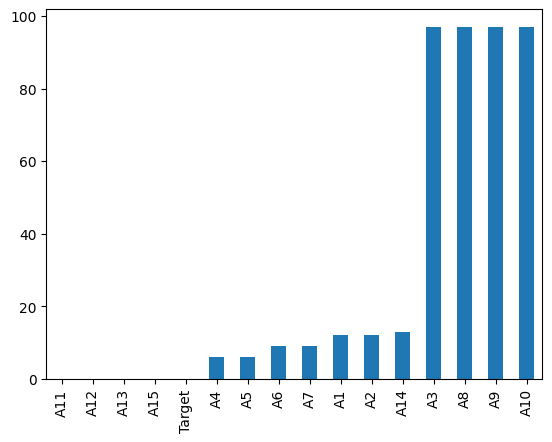

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


df.isna().sum().sort_values().plot(kind='bar')

In [18]:
#Save your prepared data:
df.to_csv("credit_approval_uci.csv", index=False)